# Data Preparation & Transformation

## Required Libraries

In [1]:
#Importing libraries required for the description of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import time
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB




## Data Description

In [2]:
#Reading the train dataset
data_predict_model = pd.read_csv('/Users/eric_na/Desktop/Ryerson/CIND820/Dataset/caravan-insurance-challenge.csv')

In [3]:
#Dropping Orgin Column
data_predict_model = data_predict_model.drop('ORIGIN', axis=1)

In [4]:
#Getting the first five rows
data_predict_model.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [5]:
#Checking any missing values
data_predict_model.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

In [6]:
#Providing descriptive statistics of the working datase
data_predict_model.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


In [7]:
#Number of Records
len(data_predict_model)

9822

In [8]:
#Number of Attributes
len(data_predict_model.columns)

86

In [9]:
#Split the dataset into predictor variables and target variable
X = data_predict_model.iloc[:,:85]
Y = data_predict_model.iloc[:,-1]

In [10]:
#Split the dataset into training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
#Concatenating X_train and Y_train as a train set
Train_set = pd.concat([X_train,Y_train],axis=1)

## Class Imbalance - Upsample Minority Class

In [11]:
#Class Balance
Train_set['CARAVAN'].value_counts()

0    7391
1     466
Name: CARAVAN, dtype: int64

In [12]:
# Separating majority and minority classes
majority_class = Train_set[Train_set.CARAVAN==0]
minority_class = Train_set[Train_set.CARAVAN==1]

# Upsampling minority class to have a 1:1 ratio
minority_class_upsampled = resample(minority_class,replace=True,n_samples=int(Train_set['CARAVAN'].value_counts()[0]),random_state=10)

# Concatinating upsampled data to the original dataset
Train_set = pd.concat([majority_class, minority_class_upsampled])

#Class Balance after Upsampling Minority Class
Train_set['CARAVAN'].value_counts()

1    7391
0    7391
Name: CARAVAN, dtype: int64

## Dimensionality Reduction Algorithms

### Step 1. High Correlation Filter: Removing columns with very similar trends

In [13]:
#Applying Spearman's rank correlation to obtain correlation between ordinal attributes
corr = Train_set.corr(method='spearman')
corr.style.background_gradient(cmap='bwr')

In [14]:
#Listing columns that have high correlations between them, with the threshold of 0.8
high_corr = []

for column1 in Train_set.columns:
    for column2 in Train_set.columns:
        if column1 != column2 and column2 not in high_corr and abs(corr[column1][column2]) > 0.8:
            high_corr.append(column1)
print(high_corr)

['MOSTYPE', 'MRELGE', 'MHHUUR', 'MZFONDS', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND']


In [15]:
#Applying High Correlation Filter
Train_set = Train_set.drop(high_corr,axis=1)

### Step 2. Performing Feature Selection Methods for Categorical Data

### Wrapper Method
#### Recursive Feature Elimination

>lr 0.682 (0.011)
>per 0.589 (0.355)
>cart 0.999 (0.002)
>rf 0.999 (0.002)
>nb 0.823 (0.007)


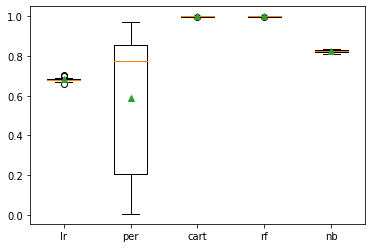

In [16]:
# Loading the data that the wrapper method is applied to
X = Train_set.drop('CARAVAN',axis=1)
Y = Train_set['CARAVAN']

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=20)
    model = Perceptron()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification and Regression Trees
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(estimator=BernoulliNB(), n_features_to_select=20)
    model = BernoulliNB()
    models['nb'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
    
# evaluate a give model using cross-validation based on recall ratio
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [17]:
# define RFE based on the rainforest classifer model which has
rfe = RFE(LogisticRegression(), n_features_to_select=20)
# fit RFE
rfe.fit(X, Y)
# summarize all features
rfe_features =[]
for i in range(X.shape[1]):
    if rfe.support_[i] == True:
        print('Column: %d' % (i ))
        rfe_features.append(i)
        

/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

Column: 18
Column: 36
Column: 37
Column: 39
Column: 41
Column: 42
Column: 43
Column: 45
Column: 46
Column: 48
Column: 49
Column: 50
Column: 51
Column: 52
Column: 53
Column: 55
Column: 56
Column: 57
Column: 58
Column: 59


### Selecting 20 variables based on Recursive Feature Elimination

In [18]:
#Selecting Predictor Variables
X = Train_set.iloc[:,rfe_features]
#Selecting Target Variables
Y = Train_set.iloc[:,-1]

# Predictive Modelling - Classification Models

## 1. Model Training & Validation

### a) Logistic Regression

In [19]:
# Logistic Regression Model Training
LR = LogisticRegression()
LR.fit(X,Y)

/Users/eric_na/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Computing cross-validated metrics on Logistic Regression Model to obtain Model Recall Rate
LR_Score = cross_val_score(LR, X, Y, scoring='recall', cv=10, n_jobs=-1)
# Model Recall Rate
print("Logistic Regression Model Recall Rate: %0.2f (+/- %0.2f)" % (LR_Score.mean(), LR_Score.std() * 2))

Logistic Regression Model Recall Rate: 0.68 (+/- 0.02)


In [21]:
# Computing cross-validated metrics on Logistic Regression Model to obtain F-Score
LR_Score = cross_val_score(LR, X, Y, scoring='f1', cv=10, n_jobs=-1)
# F-Score
print("Logistic Regression Model F-Score: %0.2f (+/- %0.2f)" % (LR_Score.mean(), LR_Score.std() * 2))

Logistic Regression Model F-Score: 0.68 (+/- 0.02)


In [22]:
# Computing cross-validated metrics on Logistic Regression Model to obtain Area under Curve
LR_Score = cross_val_score(LR, X, Y, scoring='roc_auc', cv=10, n_jobs=-1)
# Area under Curve
print("Logistic Regression Model Area under Curve: %0.2f (+/- %0.2f)" % (LR_Score.mean(), LR_Score.std() * 2))

Logistic Regression Model Area under Curve: 0.73 (+/- 0.02)


### b) Perceptron

In [23]:
# Perceptron Model Training
P = Perceptron()
P.fit(X,Y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
# Computing cross-validated metrics on Perceptron Model to obtain Model Recall Rate
P_Score = cross_val_score(P, X, Y, scoring='recall', cv=10, n_jobs=-1)
# Model Recall Rate
print("Perceptron Model Recall Rate: %0.2f (+/- %0.2f)" % (P_Score.mean(), P_Score.std() * 2))

Perceptron Model Recall Rate: 0.47 (+/- 0.65)


In [25]:
# Computing cross-validated metrics on Perceptron Model to obtain F-Score
P_Score = cross_val_score(P, X, Y, scoring='f1', cv=10, n_jobs=-1)
# F-Score
print("Perceptron Model F-Score: %0.2f (+/- %0.2f)" % (P_Score.mean(), P_Score.std() * 2))

Perceptron Model F-Score: 0.46 (+/- 0.52)


In [26]:
# Computing cross-validated metrics on Perceptron Model to obtain Area under Curve
P_Score = cross_val_score(P, X, Y, scoring='roc_auc', cv=10, n_jobs=-1)
# Area under Curve
print("Perceptron Model Area under Curve: %0.2f (+/- %0.2f)" % (P_Score.mean(), P_Score.std() * 2))

Perceptron Model Area under Curve: 0.69 (+/- 0.06)


### c) Classification and Regression Trees

In [27]:
# Classification and Regression Trees (CART) Model Training
CART=DecisionTreeClassifier()
CART.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
# Computing cross-validated metrics on CARF Model to obtain Recall Rate
CART_Score = cross_val_score(CART, X, Y, scoring='recall', cv=10, n_jobs=-1)
# Model Recall Rate
print("CART Model Recall Rate: %0.2f (+/- %0.2f)" % (CART_Score.mean(), CART_Score.std() * 2))

CART Model Recall Rate: 0.76 (+/- 0.02)


In [29]:
# Computing cross-validated metrics on CART Model to obtain F-Score
CART_Score = cross_val_score(CART, X, Y, scoring='f1', cv=10, n_jobs=-1)
# F-Score
print("CART Model F-Score: %0.2f (+/- %0.2f)" % (CART_Score.mean(), CART_Score.std() * 2))

CART Model F-Score: 0.75 (+/- 0.02)


In [30]:
# Computing cross-validated metrics on CART Model to obtain Area under Curve
CART_Score = cross_val_score(CART, X, Y, scoring='roc_auc', cv=10, n_jobs=-1)
# Area under Curve
print("CART Model Area under Curve: %0.2f (+/- %0.2f)" % (CART_Score.mean(), CART_Score.std() * 2))

CART Model Area under Curve: 0.84 (+/- 0.02)


### d) Random Forest Classifier

In [31]:
# Random Forest Classifier(RFC) Model Training
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# Computing cross-validated metrics on RFC Model to obtain Recall Rate
RFC_Score = cross_val_score(RFC, X, Y, scoring='recall', cv=10, n_jobs=-1)
# Model Recall Rate
print("RFC Model Recall Rate: %0.2f (+/- %0.2f)" % (RFC_Score.mean(), RFC_Score.std() * 2))

RFC Model Recall Rate: 0.76 (+/- 0.02)


In [33]:
# Computing cross-validated metrics on RFC Model to obtain F-Score
RFC_Score = cross_val_score(RFC, X, Y, scoring='f1', cv=10, n_jobs=-1)
# F-Score
print("RFC Model F-Score: %0.2f (+/- %0.2f)" % (RFC_Score.mean(), RFC_Score.std() * 2))

RFC Model F-Score: 0.75 (+/- 0.02)


In [34]:
# Computing cross-validated metrics on RFC Model to obtain Area under Curve
RFC_Score = cross_val_score(RFC, X, Y, scoring='roc_auc', cv=10, n_jobs=-1)
# Area under Curve
print("RFC Model Area under Curve: %0.2f (+/- %0.2f)" % (RFC_Score.mean(), RFC_Score.std() * 2))

RFC Model Area under Curve: 0.84 (+/- 0.02)


### e) Naive Bayes Classifier

In [35]:
# Naive Bayes Classifier(NBC) Model Training
NBC=BernoulliNB()
NBC.fit(X,Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [36]:
# Computing cross-validated metrics on NBC Model to obtain Recall Rate
NBC_Score = cross_val_score(NBC, X, Y, scoring='recall', cv=10, n_jobs=-1)
# Model Recall Rate
print("NBC Model Recall Rate: %0.2f (+/- %0.2f)" % (NBC_Score.mean(), NBC_Score.std() * 2))

NBC Model Recall Rate: 0.73 (+/- 0.02)


In [37]:
# Computing cross-validated metrics on RFC Model to obtain F-Score
NBC_Score = cross_val_score(NBC, X, Y, scoring='f1', cv=10, n_jobs=-1)
# F-Score
print("NBC Model F-Score: %0.2f (+/- %0.2f)" % (NBC_Score.mean(), NBC_Score.std() * 2))

NBC Model F-Score: 0.68 (+/- 0.02)


In [38]:
# Computing cross-validated metrics on RFC Model to obtain Area under Curve
NBC_Score = cross_val_score(NBC, X, Y, scoring='roc_auc', cv=10, n_jobs=-1)
# Area under Curve
print("RFC Model Area under Curve: %0.2f (+/- %0.2f)" % (NBC_Score.mean(), NBC_Score.std() * 2))

RFC Model Area under Curve: 0.71 (+/- 0.03)


## 2. Model Testing

### Loading Test Dataset & Dropping Irrelevant Columns

In [39]:
# Number of Records of the test dataset
len(X_test)
len(Y_test)

1965

In [40]:
# Number of predictor variables
len(X_test.columns)

85

In [41]:
# Dropping variables that are not used in the selected model
X_test = X_test.drop(high_corr,axis=1)
X_test = X_test.iloc[:,rfe_features]


### Performing Model Testing with Evaluation Metrics

### a) Logistic Regression

In [42]:
# Confusion Matrix
Y_pred = LR.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1246,  599],
       [  40,   80]])

In [43]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1845
           1       0.12      0.67      0.20       120

    accuracy                           0.67      1965
   macro avg       0.54      0.67      0.50      1965
weighted avg       0.92      0.67      0.76      1965



### b) Perceptron

In [44]:
# Confusion Matrix
Y_pred = P.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1069,  776],
       [  35,   85]])

In [45]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.58      0.72      1845
           1       0.10      0.71      0.17       120

    accuracy                           0.59      1965
   macro avg       0.53      0.64      0.45      1965
weighted avg       0.92      0.59      0.69      1965



### c) Classification and Regression Trees

In [46]:
# Confusion Matrix
Y_pred = CART.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1324,  521],
       [  50,   70]])

In [47]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1845
           1       0.12      0.58      0.20       120

    accuracy                           0.71      1965
   macro avg       0.54      0.65      0.51      1965
weighted avg       0.91      0.71      0.78      1965



### d) Random Forest Classifier

In [48]:
# Confusion Matrix
Y_pred = RFC.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1328,  517],
       [  54,   66]])

In [49]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1845
           1       0.11      0.55      0.19       120

    accuracy                           0.71      1965
   macro avg       0.54      0.63      0.51      1965
weighted avg       0.91      0.71      0.78      1965



### e) Naive Bayes Classifer

In [50]:
# Confusion Matrix
Y_pred = NBC.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[1086,  759],
       [  33,   87]])

In [51]:
# Classificaiton Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73      1845
           1       0.10      0.72      0.18       120

    accuracy                           0.60      1965
   macro avg       0.54      0.66      0.46      1965
weighted avg       0.92      0.60      0.70      1965



# Implications on Initial Results

- As there is a class imbalance in our testing dataset, accuracy becomes less reliable in measuring the model performance. For example, when we have a 99:1 ratio for two classes, 0 and 1 and the rare event is the case with the class 1, models can be built with 99% accuracy by having every observation belong to class 0.
- Recall should be used as it provide a better way of evaluating the model performance for the case with a class imbalance. It shows the ratio of true positives to everything positive, meaning how often it predicts the positive result (class 1) correctly.
- Given our model is build to find customers who are willing to purchase and not to miss potential customers, recall is the most effective way of measuring the model performance.
- From the 5 models above, Naive Bayes Classifer provides a 0.725 (87/(33+87)) recall ratio and is considered the best performing model.
